In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import train_test_split

In [3]:
# Загрузка датасета
data = pd.read_csv('/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
for i in data.columns[1:]:
    print(data[i].value_counts())

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4

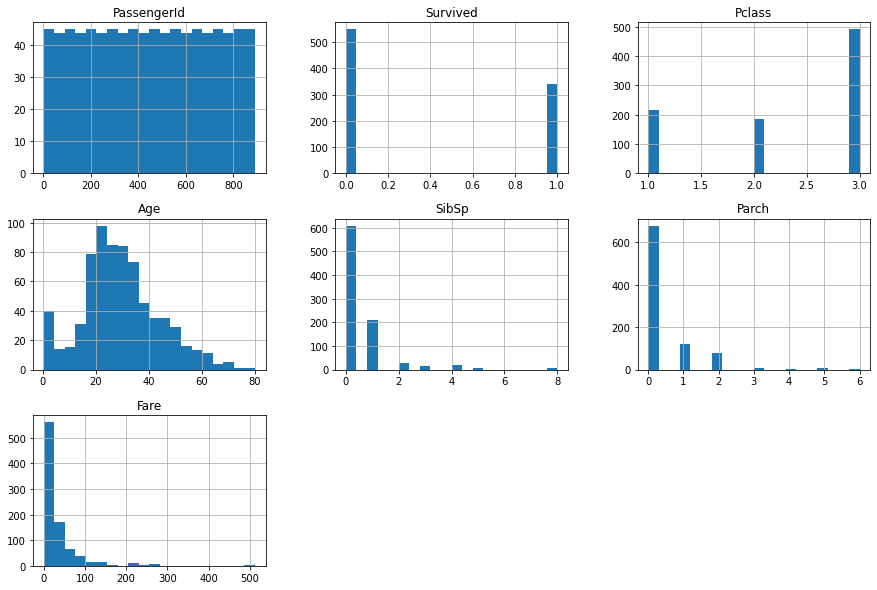

In [6]:
# Анализ датасета с помощью графиков
data.hist(bins=20, figsize=(15,10))
plt.show()

# Заполнение пропущенных значений и кодирование категориальных признаков
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Разделение на обучающую, валидационную и тестовую выборки
X = data.drop(['Survived', 'PassengerId'], axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [7]:
# Обучение модели логистической регрессии
model = LogisticRegression(max_iter=10000, solver='newton-cg')
model.fit(X_train, y_train)


LogisticRegression(max_iter=10000, solver='newton-cg')

In [8]:
# Предсказание на валидационной выборке и вычисление метрик
y_val_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

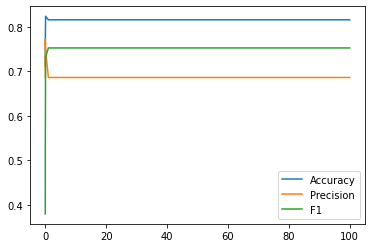

In [9]:
# Построение графиков зависимости метрик от параметров модели
c_vals = [0.001, 0.01, 0.1, 1, 10, 100]
accuracy_scores = []
precision_scores = []
f1_scores = []
for c in c_vals:
    model = LogisticRegression(max_iter=10000, C=c)
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    accuracy_scores.append(accuracy_score(y_val, y_val_pred))
    precision_scores.append(precision_score(y_val, y_val_pred))
    f1_scores.append(f1_score(y_val, y_val_pred))
plt.plot(c_vals, accuracy_scores, label='Accuracy')
plt.plot(c_vals, precision_scores, label='Precision')
plt.plot(c_vals, f1_scores, label='F1')
plt.legend()
plt.show()

In [10]:
# Оценка качества модели на тестовой выборке
y_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
print(f'Test accuracy: {accuracy}')
print(f'Test precision: {precision}')
print(f'Test f1: {f1}')

Test accuracy: 0.8097014925373134
Test precision: 0.7884615384615384
Test f1: 0.7627906976744186
